In [ ]:
from pptx import Presentation
from pptx.util import Inches
import os
from PIL import Image

img_folder = "/Users/arghavan/Graduate Center Dropbox/Arghavan Vedadi Gargari/Hydrophobic Plates/Arghavan/gZ/fixed_axis_plots/"

# Create a new PowerPoint presentation
prs = Presentation()


for filename in sorted(os.listdir(img_folder)):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
        slide = prs.slides.add_slide(prs.slide_layouts[6])  # Blank slide layout
        img_path = os.path.join(img_folder, filename)
        
        # Add the picture centered on the slide
        slide.shapes.add_picture(img_path, Inches(0), Inches(0), width=prs.slide_width)
        

output_file = os.path.join(img_folder, "/Users/arghavan/Graduate Center Dropbox/Arghavan Vedadi Gargari/Hydrophobic Plates/Arghavan/all_plots.pptx")
prs.save(output_file)
print(f"PowerPoint saved to {output_file}")


✅ PowerPoint saved to /Users/arghavan/Graduate Center Dropbox/Arghavan Vedadi Gargari/Hydrophobic Plates/Arghavan/all_plots.pptx


In [1]:
from pptx import Presentation
from pptx.util import Inches
import os
from PIL import Image

def add_images(prs, folder):
    """Add all images from a folder into an existing presentation."""

    for filename in sorted(os.listdir(folder)):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            slide = prs.slides.add_slide(prs.slide_layouts[6])
            img_path = os.path.join(folder, filename)

            img = Image.open(img_path)
            width, height = img.size
            ratio = min(prs.slide_width / width, prs.slide_height / height)
            new_width = int(width * ratio)
            new_height = int(height * ratio)
            left = int((prs.slide_width - new_width) / 2)
            top = int((prs.slide_height - new_height) / 2)

            slide.shapes.add_picture(img_path, left, top, width=new_width, height=new_height)


ppt_file = "/Users/arghavan/Graduate Center Dropbox/Arghavan Vedadi Gargari/Hydrophobic Plates/Arghavan/all_plots.pptx"

prs = Presentation(ppt_file)

PairwiseE_folder = "/Users/arghavan/Graduate Center Dropbox/Arghavan Vedadi Gargari/Hydrophobic Plates/Arghavan/gZ/gZ plots with fitted curve/both_axis_fixed/"
add_images(prs, PairwiseE_folder)

prs.save(ppt_file)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
file = '/gibbs/arghavan/hp-results-pc/number_of_waters-volume/300K_tot_num_waters_.8f.dx'

data = np.loadtxt(file, skiprows=1)
d = data[:, 0]
num_wat = data[:, 1]


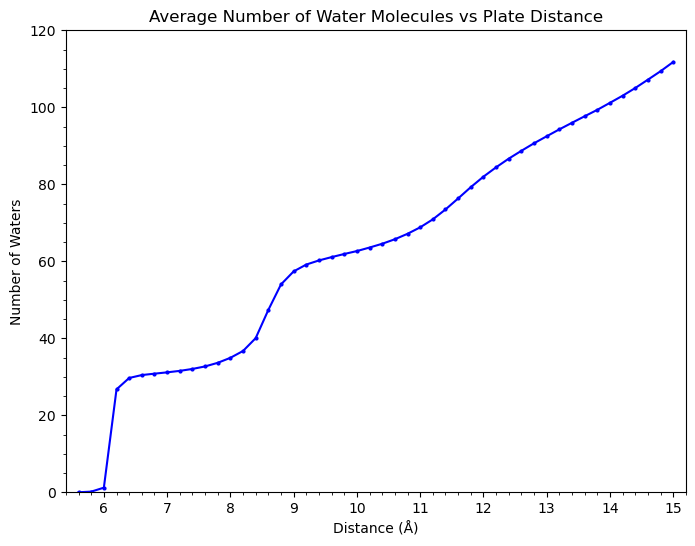

In [27]:
from matplotlib.ticker import MultipleLocator
import os

plt.figure(figsize=(8, 6))
plt.plot(d, num_wat, marker='o', markersize=2, linestyle='-', color='b')
plt.xlabel('Distance (Å)')
plt.ylabel('Number of Waters')
plt.title('Average Number of Water Molecules vs Plate Distance')

plt.ylim(bottom=0)
plt.ylim(top=120)
# plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.xlim(5.4,15.2)
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(MultipleLocator(0.2))

plt.gca().yaxis.set_major_locator(MultipleLocator(20))
plt.gca().yaxis.set_minor_locator(MultipleLocator(5))  
output_path = '/gibbs/arghavan/hydrophobic-plates-analysis/results/'

plot_path = f"/gibbs/arghavan/hp-results-pc/number_of_waters-volume/"
os.makedirs(os.path.dirname(plot_path), exist_ok=True)

plt.savefig(f'{plot_path}/number-of-waters.png', dpi=600)

plt.show()
